<a href="https://colab.research.google.com/github/gulshan0201/DATA-Science/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("===== ORIGINAL TRAIN DATA (First 5 Rows) =====")
print(train_df.head())

print("\nShape of Original Train Data:", train_df.shape)

print("\n===== ORIGINAL TEST DATA (First 5 Rows) =====")
print(test_df.head())

print("\nShape of Original Test Data:", test_df.shape)


===== ORIGINAL TRAIN DATA (First 5 Rows) =====
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Shape of Original Train Data: (45211, 17)

===== ORIGINAL TEST 

In [2]:
import numpy as np

def add_engineered_features(df):
    # --------------------------------------------------------
    # 1. Customer_Stability_Score (CSS)
    # Formula:
    # CSS = ln(balance + 1) + 1 if default == 'no', else 0
    df["Customer_Stability_Score"] = np.log1p(df["balance"]) + (df["default"] == "no").astype(int)

    # --------------------------------------------------------
    # 2. Engagement_Intensity_Index (EII)
    # Formula:
    # EII = duration / (campaign + 1) + previous
    df["Engagement_Intensity_Index"] = df["duration"] / (df["campaign"] + 1) + df["previous"]

    # --------------------------------------------------------
    # 3. Campaign_Fatigue_Indicator (CFI)
    # Formula:
    # CFI = campaign / (duration + 1)
    df["Campaign_Fatigue_Indicator"] = df["campaign"] / (df["duration"] + 1)

    return df

# Apply feature engineering
train_new = add_engineered_features(train_df.copy())
test_new = add_engineered_features(test_df.copy())


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
print("===== UPDATED TRAIN DATA WITH NEW FEATURES =====")
print(train_new[[
    "balance", "default", "duration", "campaign", "previous",
    "Customer_Stability_Score",
    "Engagement_Intensity_Index",
    "Campaign_Fatigue_Indicator"
]].head())

print("\n===== SHAPE AFTER FEATURE ENGINEERING =====")
print(train_new.shape)


===== UPDATED TRAIN DATA WITH NEW FEATURES =====
   balance default  duration  campaign  previous  Customer_Stability_Score  \
0     2143      no       261         1         0                  8.670429   
1       29      no       151         1         0                  4.401197   
2        2      no        76         1         0                  2.098612   
3     1506      no        92         1         0                  8.317876   
4        1      no       198         1         0                  1.693147   

   Engagement_Intensity_Index  Campaign_Fatigue_Indicator  
0                       130.5                    0.003817  
1                        75.5                    0.006579  
2                        38.0                    0.012987  
3                        46.0                    0.010753  
4                        99.0                    0.005025  

===== SHAPE AFTER FEATURE ENGINEERING =====
(45211, 20)


# Accuracy improvement before vs after these **features**

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# -----------------------------
# Load train data
# -----------------------------
df = pd.read_csv("train.csv")

print("===== ORIGINAL TRAIN DATA (First 5 Rows) =====")
print(df.head())
print("\nShape:", df.shape)


===== ORIGINAL TRAIN DATA (First 5 Rows) =====
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Shape: (45211, 17)


# Define Engineered Features Function

In [5]:
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds:
    - Customer_Stability_Score
    - Engagement_Intensity_Index
    - Campaign_Fatigue_Indicator
    """
    # 1. Customer_Stability_Score = ln(balance + 1) + 1 if default == 'no' else 0
    df["Customer_Stability_Score"] = np.log1p(df["balance"]) + (df["default"] == "no").astype(int)

    # 2. Engagement_Intensity_Index = duration / (campaign + 1) + previous
    df["Engagement_Intensity_Index"] = df["duration"] / (df["campaign"] + 1) + df["previous"]

    # 3. Campaign_Fatigue_Indicator = campaign / (duration + 1)
    df["Campaign_Fatigue_Indicator"] = df["campaign"] / (df["duration"] + 1)

    return df


# Prepare Columns & Helper to Build Pipeline

In [6]:
# Target variable
target_col = "y"

# Original feature columns (without target)
original_features = [
    "age", "job", "marital", "education", "default",
    "balance", "housing", "loan", "contact", "day",
    "month", "duration", "campaign", "pdays",
    "previous", "poutcome"
]

# Numeric and categorical features
numeric_features_original = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
categorical_features = [
    "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "poutcome"
]


def build_pipeline(numeric_features, categorical_features):
    """
    Creates a preprocessing + Logistic Regression pipeline
    """
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    model = LogisticRegression(max_iter=1000)

    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    return clf


# Split Data Once (Same Split for Both Models)

In [7]:
# Features (X) and Target (y)
X = df[original_features].copy()
y = df[target_col]

# Train-test split (same for both models)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (36168, 16)  Test size: (9043, 16)


# BASELINE MODEL (Before New Features)

In [8]:
# Build pipeline with ORIGINAL numeric features only
clf_baseline = build_pipeline(
    numeric_features=numeric_features_original,
    categorical_features=categorical_features
)

# Train baseline model
clf_baseline.fit(X_train, y_train)

# Predict and evaluate
y_pred_base = clf_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_base)

print(f"\n🔹 Baseline Accuracy (before new features): {baseline_accuracy:.4f}")



🔹 Baseline Accuracy (before new features): 0.9012


# MODEL WITH ENGINEERED FEATURES (After)

In [9]:
# Make a copy and add engineered features
df_eng = df.copy()
df_eng = add_engineered_features(df_eng)

# Define new feature list (original + engineered)
engineered_feature_cols = original_features + [
    "Customer_Stability_Score",
    "Engagement_Intensity_Index",
    "Campaign_Fatigue_Indicator"
]

# New numeric features list (add the 3 new ones)
numeric_features_eng = numeric_features_original + [
    "Customer_Stability_Score",
    "Engagement_Intensity_Index",
    "Campaign_Fatigue_Indicator"
]

# Re-split using same random_state (to be fair)
X_eng = df_eng[engineered_feature_cols]
y_eng = df_eng[target_col]

X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng
)

# --- FIX START ---
# Address potential -inf or NaN values generated by add_engineered_features
# The ValueError: Input X contains infinity or a value too large for dtype('float64')
# likely originates from the Customer_Stability_Score where log1p of negative balance
# can produce -infinity or NaN. StandardScaler cannot handle infinite values.
for col in ["Customer_Stability_Score", "Engagement_Intensity_Index", "Campaign_Fatigue_Indicator"]:
    if col in X_train_eng.columns:
        X_train_eng[col] = X_train_eng[col].replace([np.inf, -np.inf], np.nan)
        X_train_eng[col] = X_train_eng[col].fillna(0) # Fill NaNs with 0
    if col in X_test_eng.columns:
        X_test_eng[col] = X_test_eng[col].replace([np.inf, -np.inf], np.nan)
        X_test_eng[col] = X_test_eng[col].fillna(0) # Fill NaNs with 0
# --- FIX END ---

# Build pipeline with extended numeric features
clf_eng = build_pipeline(
    numeric_features=numeric_features_eng,
    categorical_features=categorical_features
)

# Train enhanced model
clf_eng.fit(X_train_eng, y_train_eng)

# Predict and evaluate
y_pred_eng = clf_eng.predict(X_test_eng)
enhanced_accuracy = accuracy_score(y_test_eng, y_pred_eng)

print(f"🔹 Enhanced Accuracy (after new features): {enhanced_accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


🔹 Enhanced Accuracy (after new features): 0.9022


# Compare Accuracy (Print & Plot)


================= ACCURACY COMPARISON =================
Baseline model (without new features): 0.9012
Enhanced model (with new features)   : 0.9022
Improvement                          : 0.0010


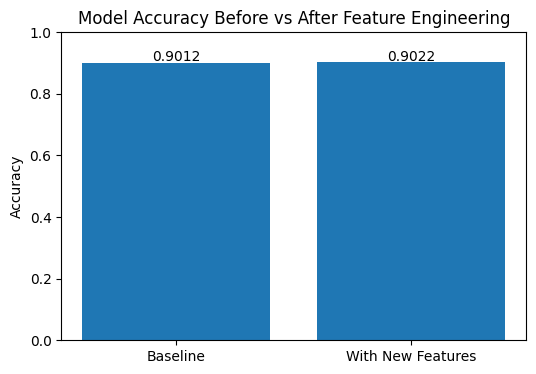

In [10]:
print("\n================= ACCURACY COMPARISON =================")
print(f"Baseline model (without new features): {baseline_accuracy:.4f}")
print(f"Enhanced model (with new features)   : {enhanced_accuracy:.4f}")
print(f"Improvement                          : {enhanced_accuracy - baseline_accuracy:.4f}")

# --- Bar chart comparison ---
models = ["Baseline", "With New Features"]
accuracies = [baseline_accuracy, enhanced_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Before vs After Feature Engineering")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha="center")
plt.ylim(0, 1)
plt.show()


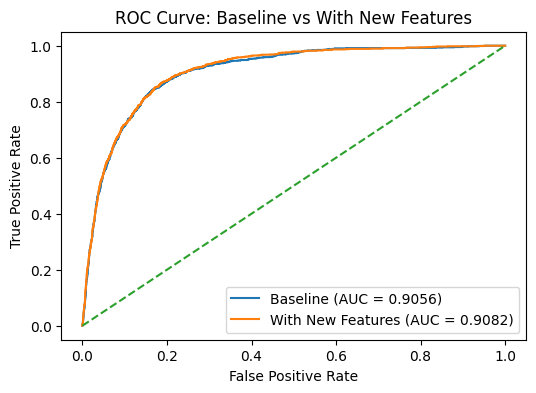

========== ROC AUC COMPARISON ==========
Baseline AUC         : 0.9056
With New Features AUC: 0.9082
AUC Improvement      : 0.0027


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Convert targets to binary (yes -> 1, no -> 0)
# ---------------------------------------------------
y_test_binary = (y_test == "yes").astype(int)
y_test_eng_binary = (y_test_eng == "yes").astype(int)

# ---------------------------------------------------
# 2. Probabilities from both models
# ---------------------------------------------------
y_prob_base = clf_baseline.predict_proba(X_test)[:, 1]
y_prob_eng = clf_eng.predict_proba(X_test_eng)[:, 1]

# ---------------------------------------------------
# 3. AUC values (use roc_auc_score for clarity)
# ---------------------------------------------------
roc_auc_base = roc_auc_score(y_test_binary, y_prob_base)
roc_auc_eng = roc_auc_score(y_test_eng_binary, y_prob_eng)

# ---------------------------------------------------
# 4. ROC curves (FPR/TPR)
# ---------------------------------------------------
fpr_base, tpr_base, _ = roc_curve(y_test_binary, y_prob_base)
fpr_eng, tpr_eng, _ = roc_curve(y_test_eng_binary, y_prob_eng)

# ---------------------------------------------------
# 5. Plot BOTH curves in one graph
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(fpr_base, tpr_base,
         label=f"Baseline (AUC = {roc_auc_base:.4f})")
plt.plot(fpr_eng, tpr_eng,
         label=f"With New Features (AUC = {roc_auc_eng:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Baseline vs With New Features")
plt.legend()
plt.show()

# ---------------------------------------------------
# 6. Print AUC comparison (same 4 decimals)
# ---------------------------------------------------
print("========== ROC AUC COMPARISON ==========")
print(f"Baseline AUC         : {roc_auc_base:.4f}")
print(f"With New Features AUC: {roc_auc_eng:.4f}")
print(f"AUC Improvement      : {roc_auc_eng - roc_auc_base:.4f}")


# Learning Curve

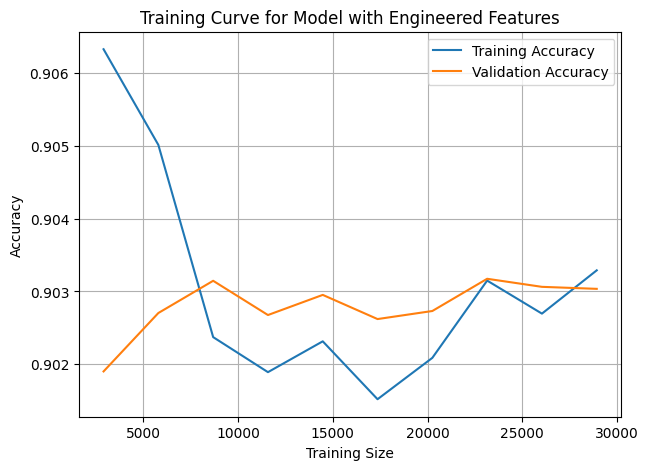

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# Use enhanced model and data
# -------------------------------------------------
X_plot = X_train_eng
y_plot = y_train_eng

train_sizes, train_scores, validation_scores = learning_curve(
    clf_eng,
    X_plot,
    y_plot,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean scores
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

# -------------------------------------------------
# Plot Training Curve
# -------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, validation_mean, label="Validation Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Training Curve for Model with Engineered Features")
plt.legend()
plt.grid(True)
plt.show()


# Confusion Matrix (Before vs After)

<Figure size 640x480 with 0 Axes>

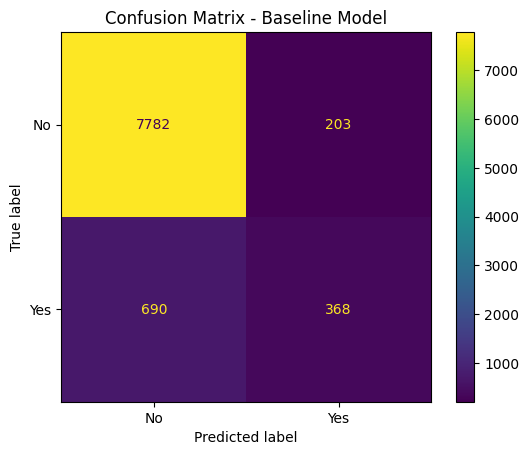

<Figure size 640x480 with 0 Axes>

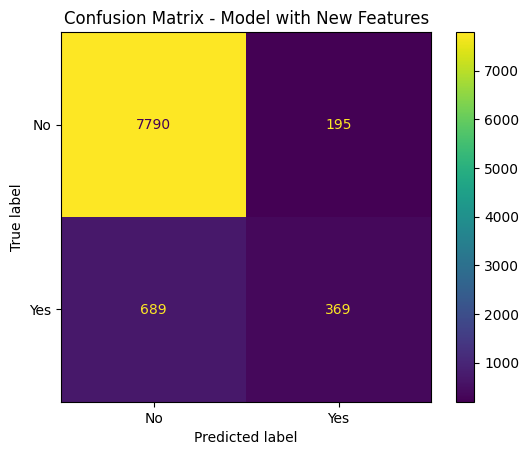

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert labels to binary for clarity (optional)
y_test_bin = (y_test == "yes").astype(int)
y_test_eng_bin = (y_test_eng == "yes").astype(int)

# -------- Baseline Model --------
y_pred_base = clf_baseline.predict(X_test)
y_pred_base_bin = (y_pred_base == "yes").astype(int)

cm_base = confusion_matrix(y_test_bin, y_pred_base_bin)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base,
                                   display_labels=["No", "Yes"])

plt.figure()
disp_base.plot(values_format="d")
plt.title("Confusion Matrix - Baseline Model")
plt.show()

# -------- Enhanced Model (with new features) --------
y_pred_eng = clf_eng.predict(X_test_eng)
y_pred_eng_bin = (y_pred_eng == "yes").astype(int)

cm_eng = confusion_matrix(y_test_eng_bin, y_pred_eng_bin)
disp_eng = ConfusionMatrixDisplay(confusion_matrix=cm_eng,
                                  display_labels=["No", "Yes"])

plt.figure()
disp_eng.plot(values_format="d")
plt.title("Confusion Matrix - Model with New Features")
plt.show()


# Precision, Recall, F1 (Numeric Comparison)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Baseline
precision_base = precision_score(y_test_bin, y_pred_base_bin)
recall_base = recall_score(y_test_bin, y_pred_base_bin)
f1_base = f1_score(y_test_bin, y_pred_base_bin)

# Enhanced
precision_eng = precision_score(y_test_eng_bin, y_pred_eng_bin)
recall_eng = recall_score(y_test_eng_bin, y_pred_eng_bin)
f1_eng = f1_score(y_test_eng_bin, y_pred_eng_bin)

print("====== METRIC COMPARISON (Yes class) ======")
print(f"Baseline  - Precision: {precision_base:.4f}, Recall: {recall_base:.4f}, F1: {f1_base:.4f}")
print(f"Enhanced  - Precision: {precision_eng:.4f}, Recall: {recall_eng:.4f}, F1: {f1_eng:.4f}")
print(f"ΔPrecision: {precision_eng - precision_base:.4f}")
print(f"ΔRecall   : {recall_eng - recall_base:.4f}")
print(f"ΔF1       : {f1_eng - f1_base:.4f}")


====== METRIC COMPARISON (Yes class) ======
Baseline  - Precision: 0.6445, Recall: 0.3478, F1: 0.4518
Enhanced  - Precision: 0.6543, Recall: 0.3488, F1: 0.4550
ΔPrecision: 0.0098
ΔRecall   : 0.0009
ΔF1       : 0.0032


# Precision–Recall Curve (Both Models)

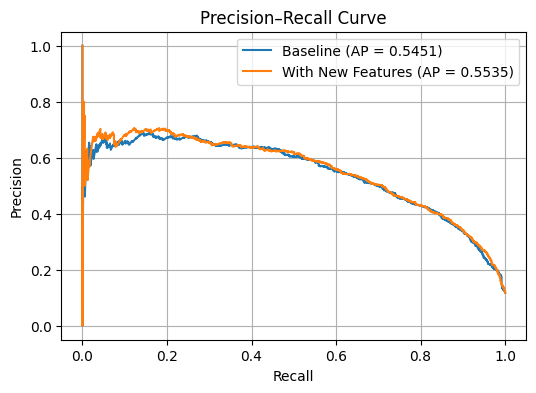

====== AVERAGE PRECISION (AREA UNDER PR CURVE) ======
Baseline AP : 0.5451
Enhanced AP : 0.5535
Improvement : 0.0084


In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Probabilities
y_prob_base = clf_baseline.predict_proba(X_test)[:, 1]
y_prob_eng = clf_eng.predict_proba(X_test_eng)[:, 1]

# PR curves
prec_base, rec_base, _ = precision_recall_curve(y_test_bin, y_prob_base)
prec_eng, rec_eng, _ = precision_recall_curve(y_test_eng_bin, y_prob_eng)

ap_base = average_precision_score(y_test_bin, y_prob_base)
ap_eng = average_precision_score(y_test_eng_bin, y_prob_eng)

plt.figure(figsize=(6,4))
plt.plot(rec_base, prec_base, label=f"Baseline (AP = {ap_base:.4f})")
plt.plot(rec_eng, prec_eng, label=f"With New Features (AP = {ap_eng:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

print("====== AVERAGE PRECISION (AREA UNDER PR CURVE) ======")
print(f"Baseline AP : {ap_base:.4f}")
print(f"Enhanced AP : {ap_eng:.4f}")
print(f"Improvement : {ap_eng - ap_base:.4f}")


# Feature Importance (Using Logistic Coefficients)

===== TOP 20 MOST IMPORTANT FEATURES (LOGISTIC COEFF) =====
                       feature  coefficient  abs_coeff
9   Campaign_Fatigue_Indicator    -9.899705   9.899705
45                   month_mar     1.453931   1.453931
52            poutcome_success     1.421458   1.421458
42                   month_jan    -1.335985   1.335985
37             contact_unknown    -1.257439   1.257439
47                   month_nov    -0.956919   0.956919
50            poutcome_failure    -0.876568   0.876568
43                   month_jul    -0.870628   0.870628
53            poutcome_unknown    -0.811454   0.811454
32                 housing_yes    -0.748235   0.748235
49                   month_sep     0.747813   0.747813
39                   month_aug    -0.744862   0.744862
48                   month_oct     0.713745   0.713745
40                   month_dec     0.671988   0.671988
34                    loan_yes    -0.609515   0.609515
3                     duration     0.585215   0.585215
51   

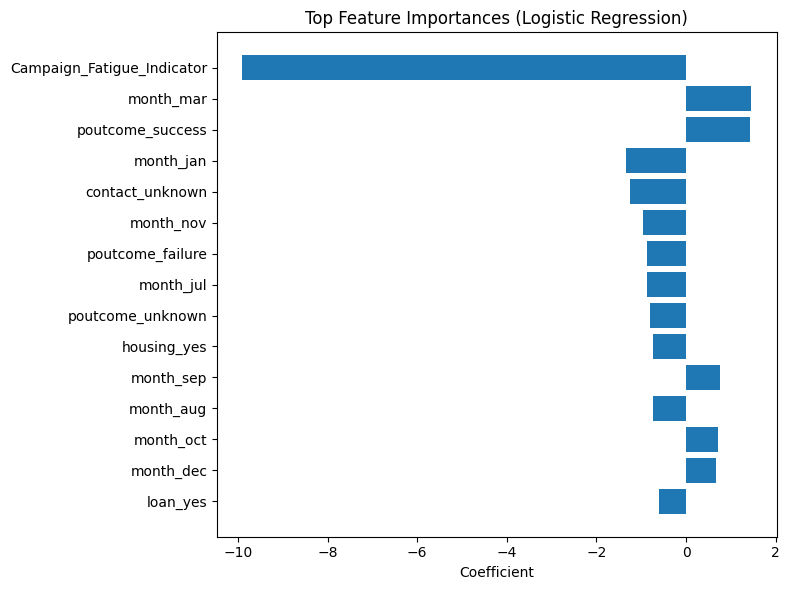

In [16]:
import numpy as np

# 1. Get trained preprocessor and classifier from pipeline
preprocessor = clf_eng.named_steps["preprocessor"]
classifier = clf_eng.named_steps["classifier"]

# 2. Get feature names after preprocessing
#    Numeric features stay as they are
num_features = numeric_features_eng

#    Categorical: use OneHotEncoder categories_
ohe = preprocessor.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([num_features, cat_feature_names])

# 3. Get coefficients from Logistic Regression
coefs = classifier.coef_[0]  # shape: (n_features,)

# 4. Put into DataFrame and sort
feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coefs,
    "abs_coeff": np.abs(coefs)
}).sort_values("abs_coeff", ascending=False)

# Show top 20 most important features
print("===== TOP 20 MOST IMPORTANT FEATURES (LOGISTIC COEFF) =====")
print(feat_imp.head(20))

# 5. Plot (horizontal bar chart)
top_n = 15
top_feats = feat_imp.head(top_n)

plt.figure(figsize=(8,6))
plt.barh(top_feats["feature"], top_feats["coefficient"])
plt.xlabel("Coefficient")
plt.title("Top Feature Importances (Logistic Regression)")
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()
plt.show()
